## EDA and Pre-processing


### In this code are runing the analysis to understand the shape of the data and extract insights for the feature engineering process
                                         

                                         

In [1]:
import numpy as np
import pandas as pd
import csv
from pandas import Series

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# read both files provided 

DfTrain = pd.read_csv('train_ver2.csv' )
DfTest = pd.read_csv('test_ver2.csv')

C:\Users\acris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\acris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
DfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [5]:
DfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
fecha_dato               929615 non-null object
ncodpers                 929615 non-null int64
ind_empleado             929615 non-null object
pais_residencia          929615 non-null object
sexo                     929610 non-null object
age                      929615 non-null int64
fecha_alta               929615 non-null object
ind_nuevo                929615 non-null int64
antiguedad               929615 non-null int64
indrel                   929615 non-null int64
ult_fec_cli_1t           1683 non-null object
indrel_1mes              929592 non-null float64
tiprel_1mes              929592 non-null object
indresi                  929615 non-null object
indext                   929615 non-null object
conyuemp                 104 non-null object
canal_entrada            927534 non-null object
indfall                  929615 non-null object
tipodom                  929615 no

We have for trainining file 13647308 rows  with 956645 distinct customers. For test number of rows and distinct customers is equal as we have only one period in this file. Morever, all the customers in test file have at least one period in the test file. This means that we will not have totally new customers to predict (but all of them will have some history in the training data)

Analysis on customer ids ('ncodpers')

In [6]:
print("Distinct customers in train:" , len(set(DfTrain.ncodpers))    )
print("Distinct customers in test:" , len(set(DfTest.ncodpers))    )
print("Common distinct customers in test and training :" , len( set(DfTrain.ncodpers).intersection(set(DfTest.ncodpers)) ))

Distinct customers in train: 956645
Distinct customers in test: 929615
Common distinct customers in test and training : 929615


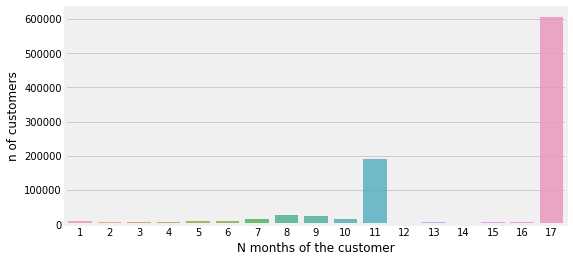

In [7]:
num_occur =DfTrain.groupby('ncodpers').agg('size').value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.8)
plt.xlabel('N months of the customer', fontsize=12)
plt.ylabel('n of customers', fontsize=12)
plt.show()

The majority of the customers are present in the 17 months

Analysys on periods 'fecha_dato'

- count customer and count distinct per period

In [8]:
agg_fecha =DfTrain.groupby('fecha_dato')

n_ncodpers_U=agg_fecha.ncodpers.nunique()
n_ncodpers=agg_fecha.ncodpers.count()


In [9]:
print("Check for duplications:")
n_ncodpers_U!=n_ncodpers

Check for duplications:


fecha_dato
2015-01-28    False
2015-02-28    False
2015-03-28    False
2015-04-28    False
2015-05-28    False
2015-06-28    False
2015-07-28    False
2015-08-28    False
2015-09-28    False
2015-10-28    False
2015-11-28    False
2015-12-28    False
2016-01-28    False
2016-02-28    False
2016-03-28    False
2016-04-28    False
2016-05-28    False
Name: ncodpers, dtype: bool

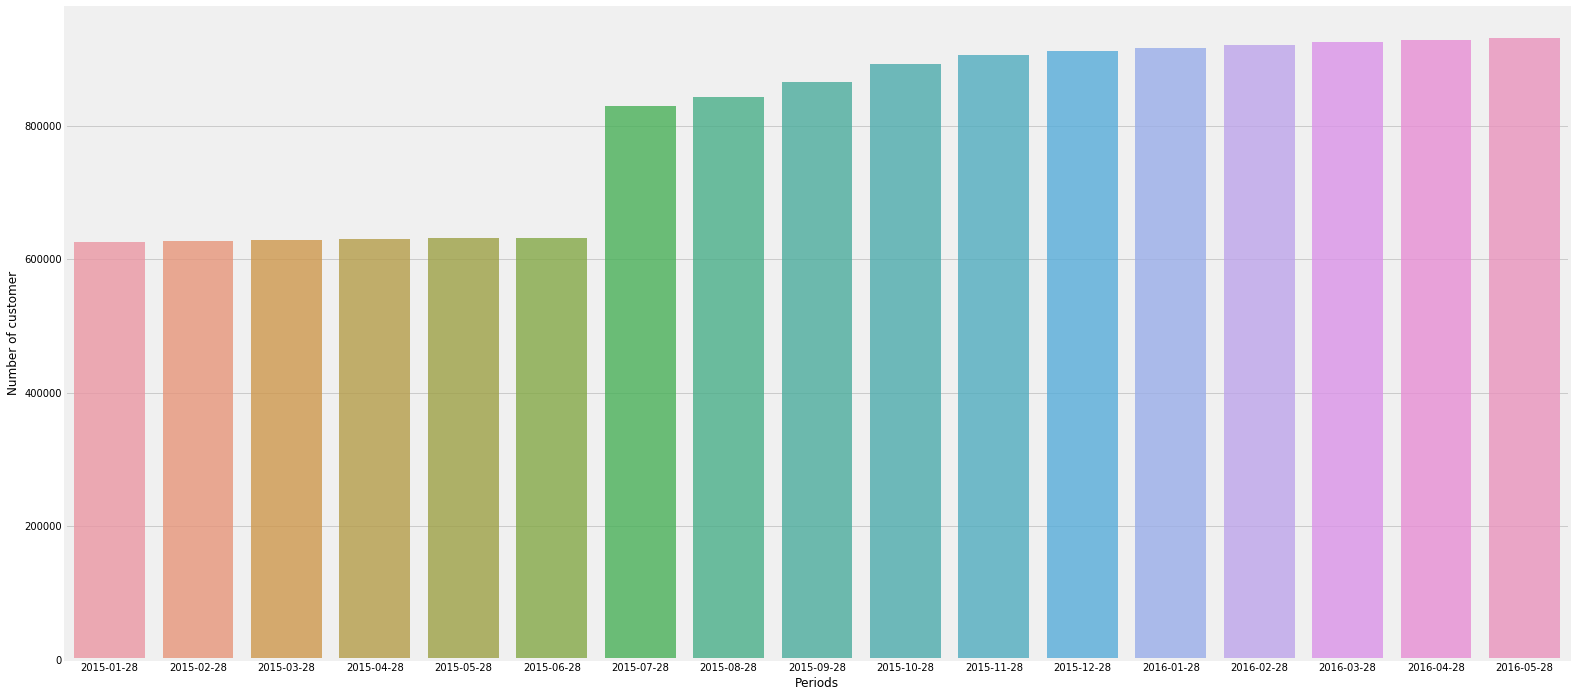

In [80]:
plt.figure(figsize=(24,12))
sns.barplot(n_ncodpers.index,n_ncodpers.values, alpha=0.8)
plt.ylabel('Number of customer', fontsize=12)
plt.xlabel('Periods', fontsize=12)
plt.show()

Insights:
- customers have only one row per period (no need to treat duplications in pre-procing)
- number of customer jump in july 2015




Products Analysis
- products owned during the period
- products acquired during the period

In [11]:
product_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
product_names=['Saving_Account','Guarantees','Current_Accounts','Derivada_Account',	'Payroll_Account','Junior_Account','Más_particular_Account','particular_Account','particular_Plus_Account','Short_term_deposits','Medium_term_deposits','Long_term_deposits','e_account','Funds','Mortgage','Pensions','Loans','Taxes','Credit_Card',	'Securities',	'Home_Account','Payroll','Pensions','Direct_Debit']

n_products =DfTrain[product_cols].sum(axis=0).sort_values(ascending=False)


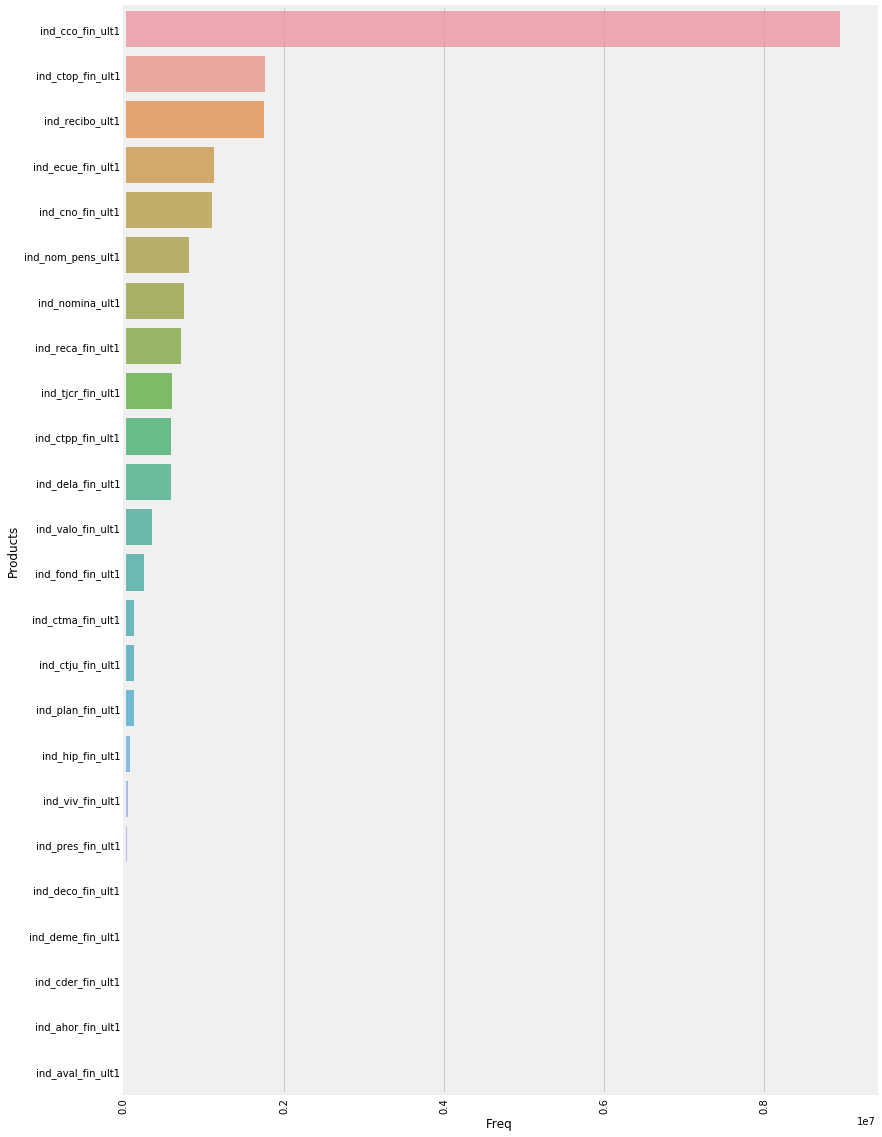

In [12]:

plt.figure(figsize=(12,20))
sns.barplot(n_products.values,n_products.index,  alpha=0.8, label=product_names)
plt.xlabel('Freq', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# ind_ahor_fin_ult1	Saving Account
# ind_aval_fin_ult1	Guarantees
# ind_cco_fin_ult1	Current Accounts
# ind_cder_fin_ult1	Derivada Account
# ind_cno_fin_ult1	Payroll Account
# ind_ctju_fin_ult1	Junior Account
# ind_ctma_fin_ult1	Más particular Account
# ind_ctop_fin_ult1	particular Account
# ind_ctpp_fin_ult1	particular Plus Account
# ind_deco_fin_ult1	Short-term deposits
# ind_deme_fin_ult1	Medium-term deposits
# ind_dela_fin_ult1	Long-term deposits
# ind_ecue_fin_ult1	e-account
# ind_fond_fin_ult1	Funds
# ind_hip_fin_ult1	Mortgage
# ind_plan_fin_ult1	Pensions
# ind_pres_fin_ult1	Loans
# ind_reca_fin_ult1	Taxes
# ind_tjcr_fin_ult1	Credit Card
# ind_valo_fin_ult1	Securities
# ind_viv_fin_ult1	Home Account
# ind_nomina_ult1	Payroll
# ind_nom_pens_ult1	Pensions
# ind_recibo_ult1	Direct Debit

-	There are a few products which are very popular while the rest are not so popular (some of them are equal to zero in some periods)

In [13]:
n_products.sort_values(ascending=False)

ind_cco_fin_ult1     8945588.0
ind_ctop_fin_ult1    1760616.0
ind_recibo_ult1      1745712.0
ind_ecue_fin_ult1    1129227.0
ind_cno_fin_ult1     1103620.0
ind_nom_pens_ult1     810085.0
ind_nomina_ult1       745961.0
ind_reca_fin_ult1     716980.0
ind_tjcr_fin_ult1     605786.0
ind_ctpp_fin_ult1     591008.0
ind_dela_fin_ult1     586381.0
ind_valo_fin_ult1     349475.0
ind_fond_fin_ult1     252284.0
ind_ctma_fin_ult1     132742.0
ind_ctju_fin_ult1     129297.0
ind_plan_fin_ult1     125159.0
ind_hip_fin_ult1       80336.0
ind_viv_fin_ult1       52511.0
ind_pres_fin_ult1      35857.0
ind_deco_fin_ult1      24275.0
ind_deme_fin_ult1      22668.0
ind_cder_fin_ult1       5376.0
ind_ahor_fin_ult1       1396.0
ind_aval_fin_ult1        316.0
dtype: float64

##### The focus is not on the products owned but in the products acquired and their trend as this is the objective of the model. To find the product the were actually acquired during the period is necessary to run the code bellow. A product is acuired in period t when is present in period t and is not present in period t-1. The code bellow builds a dataframe with the product acquired and also dropped for each period

In [ ]:
def clean_val(row,cols):
    outval = []
    for col in cols:
        if row[col].strip() not in ['1','0']:
            v = 0
        else:
            v = int(float(row[col]))
        outval.append(v)
    return outval

product_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']



product_names=['Saving_Account','Guarantees','Current_Accounts','Derivada_Account'	'Payroll_Account','Junior_Account','Más_particular_Account','particular_Account','particular_Plus_Account','Short_term_deposits','Medium_term_deposits','Long_term_deposits','e_account','Funds','Mortgage','Pensions','Loans','Taxes','Credit_Card',	'Securities',	'Home_Account','Payroll','Pensions','Direct_Debit']


other_cols=["fecha_dato","ncodpers","ind_empleado","pais_residencia","sexo","age","ind_nuevo","antiguedad","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","ind_actividad_cliente","renta","segmento"
]

#this code will run all the periods in the list t

t=[ '2015-01-28',
    '2015-02-28',
    '2015-03-28',
    '2015-04-28',
    '2015-05-28',
    '2015-06-28',
    '2015-07-28',
    '2015-08-28',
    '2015-09-28',
    '2015-10-28',
    '2015-11-28',
    '2015-12-28',
    '2016-01-28',
    '2016-02-28',
    '2016-03-28',
    '2016-04-28',
    '2016-05-28'
  ]
df_newProd= pd.DataFrame([])
df_dropProd= pd.DataFrame([])
for prev, fecha in zip(t, t[1:]):
    with open(train_file ) as csvfile:
        reader = csv.DictReader(csvfile)
        cust_dict={}
        x_vars_list = []
        y_vars_list = []
        ncodpers_list=[]
        ncodpers_drop=[]
        drop=[]
        new=[]
        test=[]
        test1=[]
        for row in reader:
            if row['fecha_dato'] not in [prev,fecha]:

                #only the date in the list are taken
                continue
            test1.append(prev)
            cust_id = int(row['ncodpers'])
            if row['fecha_dato'] in [prev]:
                #only for this date this piece of code runs
                test.append( int(row['ncodpers']))
                target_list = clean_val(row,product_cols)
                cust_dict[cust_id] =  target_list[:]
                continue
            elif row['fecha_dato'] in [fecha]:
                test1.append( int(row['ncodpers']))
                prev_target_list = cust_dict.get(cust_id, [0]*24)
                target_list = clean_val(row,product_cols)
                new_products = [max(x1 - x2,0) for (x1, x2) in zip(target_list, prev_target_list)]
                drop_products = [(min(x1 - x2,0)*-1) for (x1, x2) in zip(target_list, prev_target_list)]
                if sum(new_products) > 0:
                    new.append(new_products)
                    ncodpers_list.append(row['ncodpers'])
                    for ind, prod in enumerate(new_products):
                        if prod>0:
                            #x_vars_list.append(prev_target_list)
                            y_vars_list.append(ind)
                elif sum(drop_products) > 0:
                    drop.append(drop_products)
                    ncodpers_drop.append(row['ncodpers'])
    df_ncodpers=pd.DataFrame(ncodpers_list,columns=['ncodpers'])
    df_ncodpers['fecha_dato']=fecha
    df_new=pd.DataFrame(new,columns=product_cols)
    df_month=df_ncodpers.join(df_new)
    df_newProd=df_newProd.append(df_month)
    
    df_ncod_drop=pd.DataFrame(ncodpers_drop,columns=['ncodpers'])
    df_ncod_drop['fecha_dato']=fecha
    df_drop=pd.DataFrame(drop,columns=product_cols)
    df_month_drop=df_ncod_drop.join(df_drop)
    df_dropProd=df_dropProd.append(df_month_drop)
    
    
    


In [ ]:
#write data in csv files for the next script
df_newProd.to_csv('newProd.csv',index=False)
df_dropProd.to_csv('dropProd.csv',index=False)


In [17]:
product_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']


In [19]:
n_prdAcquired_month=df_newProd.groupby('fecha_dato')[product_cols].sum()

In [20]:
sum_prAcquired_month=n_prdAcquired_month.sum(axis=1)

In [21]:
print(sum_prAcquired_month)
print(np.average(sum_prAcquired_month))

fecha_dato
2015-02-28    36218
2015-03-28    36466
2015-04-28    34421
2015-05-28    30417
2015-06-28    45679
2015-07-28    47316
2015-08-28    40886
2015-09-28    52200
2015-10-28    56476
2015-11-28    44231
2015-12-28    46164
2016-01-28    35393
2016-02-28    52203
2016-03-28    38312
2016-04-28    35229
2016-05-28    37897
dtype: int64
41844.25


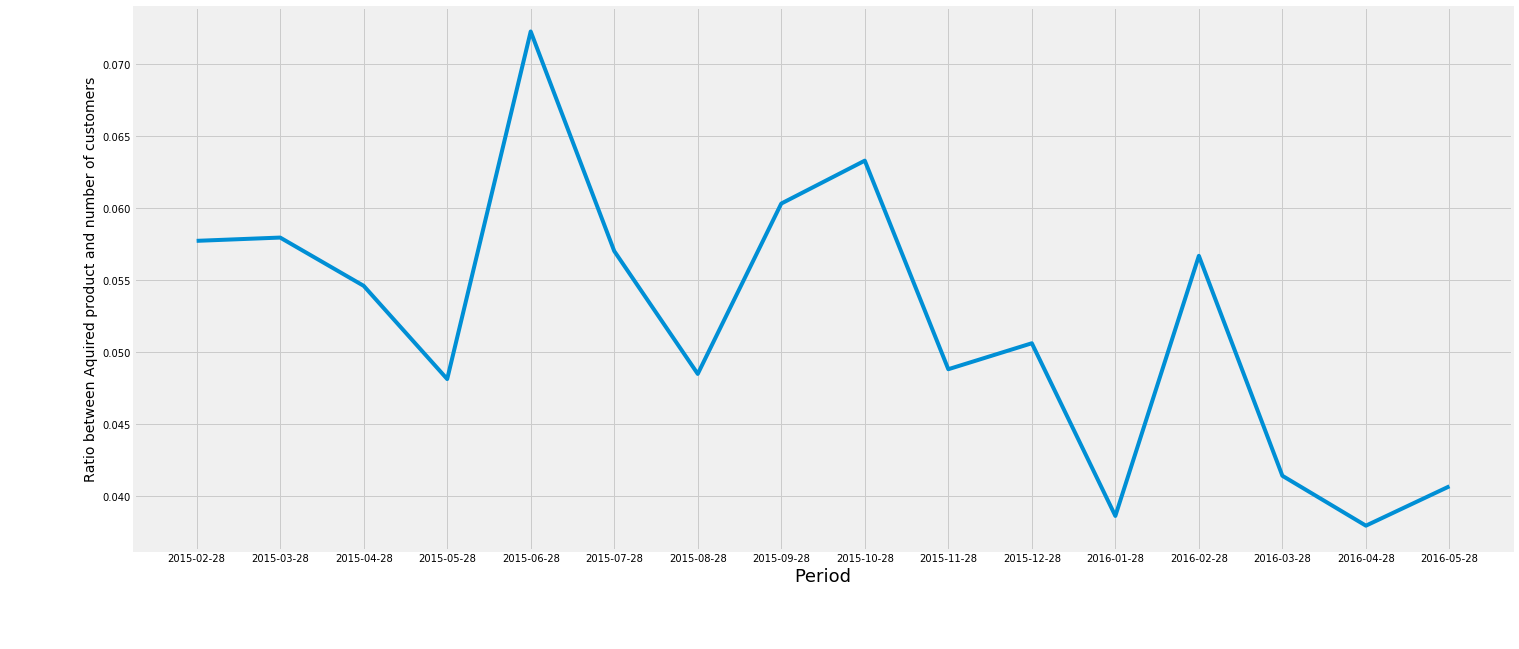

In [96]:
plt.figure(figsize=(22,10))
plt.plot(sum_prAcquired_month/n_ncodpers)
plt.annotate('iii',  xy=(0.08, 0.58), xytext=(0.08, 0.58),arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel('Ratio between Aquired product and number of customers', fontsize=14)
plt.xlabel('Period', fontsize=18)
plt.show()

#####  insights:
number of product bought is actually quite low: only arround 42000 product are aquired monthly. Ratio between new product and number of customer is decresing
    

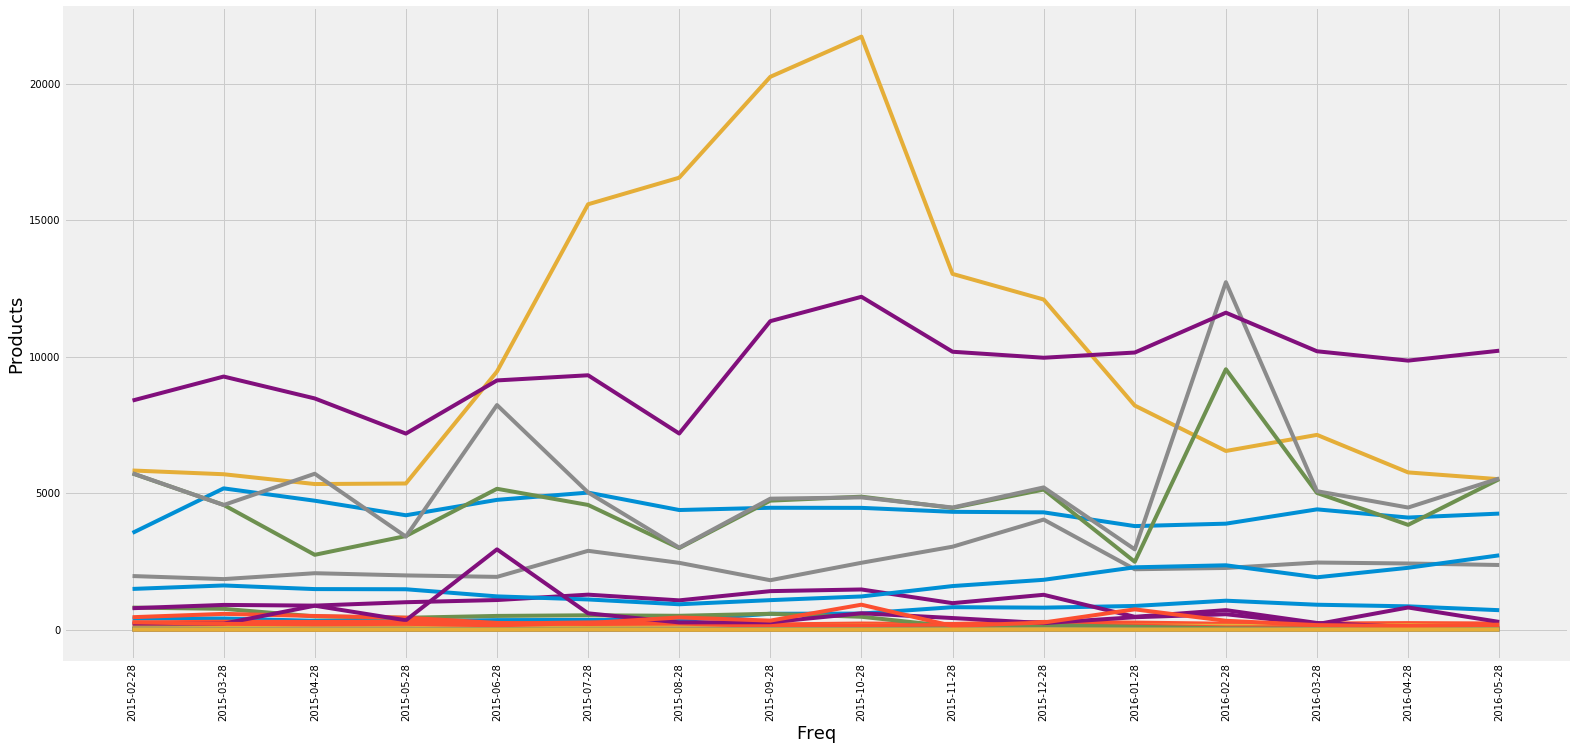

In [85]:

plt.figure(figsize=(24,12))
plt.plot(n_prdAcquired_month.index, n_prdAcquired_month.values )
plt.xlabel('Freq', fontsize=18)
plt.ylabel('Products', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

Acquisition during the year seams to follow a seasonal pattern for some products. This is both a general seasonal effect, and a specific trend for group of products. This needs to be accounted for when choosing the training period. Moreover, one of the peaks is in June 2015. This is very relevant as we have to predict June 2016

In [24]:
n_prdAcquired_month[product_cols].sum(axis=0).sort_values(ascending=False)

ind_cco_fin_ult1     164092
ind_recibo_ult1      154642
ind_nom_pens_ult1     85767
ind_nomina_ult1       74766
ind_tjcr_fin_ult1     69781
ind_cno_fin_ult1      38199
ind_ecue_fin_ult1     26601
ind_dela_fin_ult1     13726
ind_ctma_fin_ult1      9710
ind_reca_fin_ult1      9320
ind_deco_fin_ult1      5205
ind_valo_fin_ult1      4930
ind_ctop_fin_ult1      3925
ind_fond_fin_ult1      3775
ind_ctpp_fin_ult1      2435
ind_ctju_fin_ult1      1274
ind_plan_fin_ult1       653
ind_deme_fin_ult1       250
ind_pres_fin_ult1       161
ind_cder_fin_ult1       142
ind_hip_fin_ult1         78
ind_viv_fin_ult1         70
ind_aval_fin_ult1         4
ind_ahor_fin_ult1         2
dtype: int64

In [25]:
len(set(df_newProd.ncodpers))

272865

In [26]:
DfTrain.columns[0:24]

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

In [27]:
n_prdDropped_month=df_dropProd.groupby('fecha_dato')[product_cols].sum()

In [28]:
sum_prDropped_month=n_prdDropped_month.sum(axis=1)

In [29]:
print(sum_prDropped_month)


fecha_dato
2015-02-28    27570
2015-03-28    25086
2015-04-28    23134
2015-05-28    30006
2015-06-28    21720
2015-07-28    24076
2015-08-28    31079
2015-09-28    24970
2015-10-28    26453
2015-11-28    28272
2015-12-28    22769
2016-01-28    42532
2016-02-28    28785
2016-03-28    25321
2016-04-28    26823
2016-05-28    25535
dtype: int64


In [30]:
print(np.average(sum_prDropped_month))

27133.1875


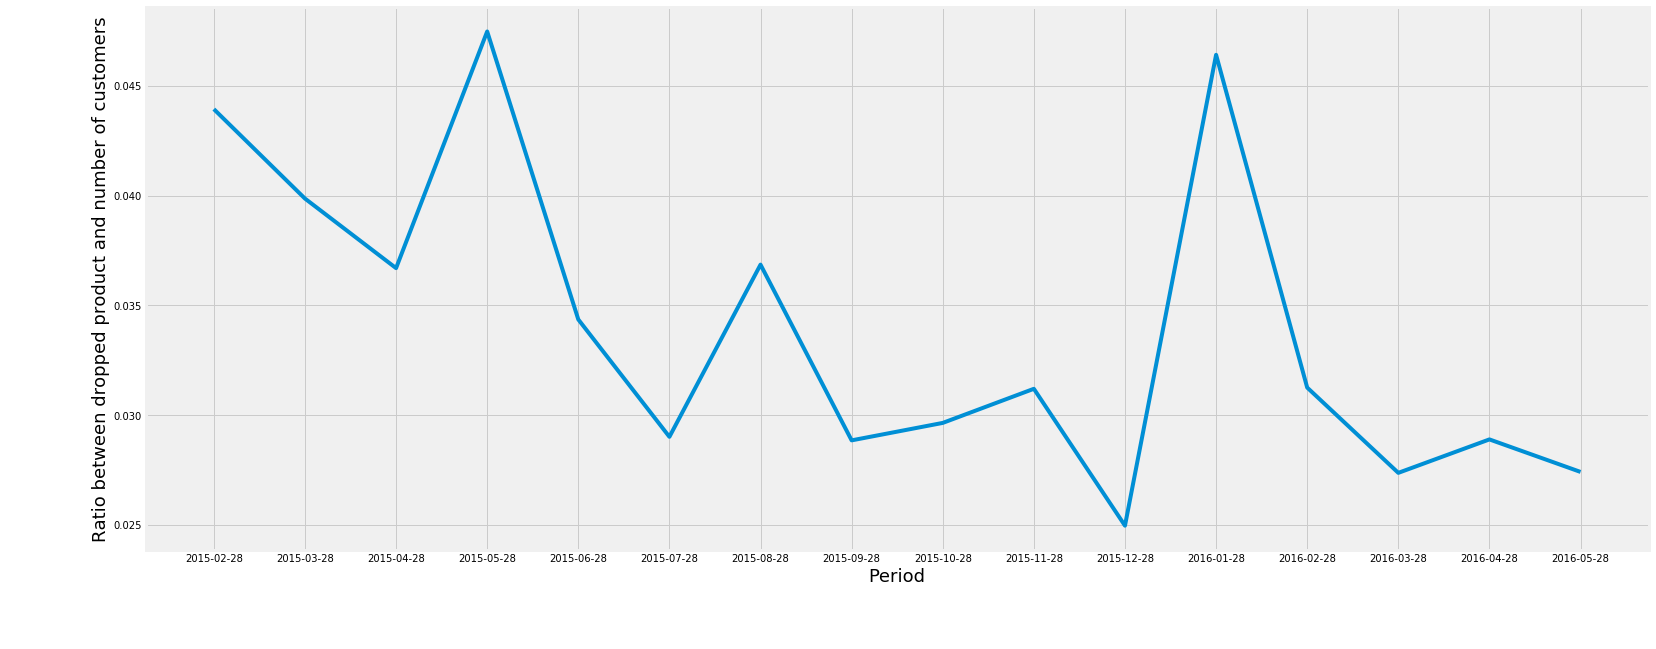

In [98]:
plt.figure(figsize=(24,10))
plt.plot(sum_prDropped_month/n_ncodpers)
plt.annotate('iii',  xy=(0.08, 0.58), xytext=(0.08, 0.58),arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel('Ratio between dropped product and number of customers', fontsize=18)
plt.xlabel('Period', fontsize=18)

plt.show()

#### Ratio of products dismissed have a similar trend to acquired product, but shifted of one period back. For example, 2015-06 is a peek for the acquired products, when this is 2015-05 for dropped products. Clearly there is a kind of substitution pattern. Similar tren is showed in the trend for single produc bellow.  

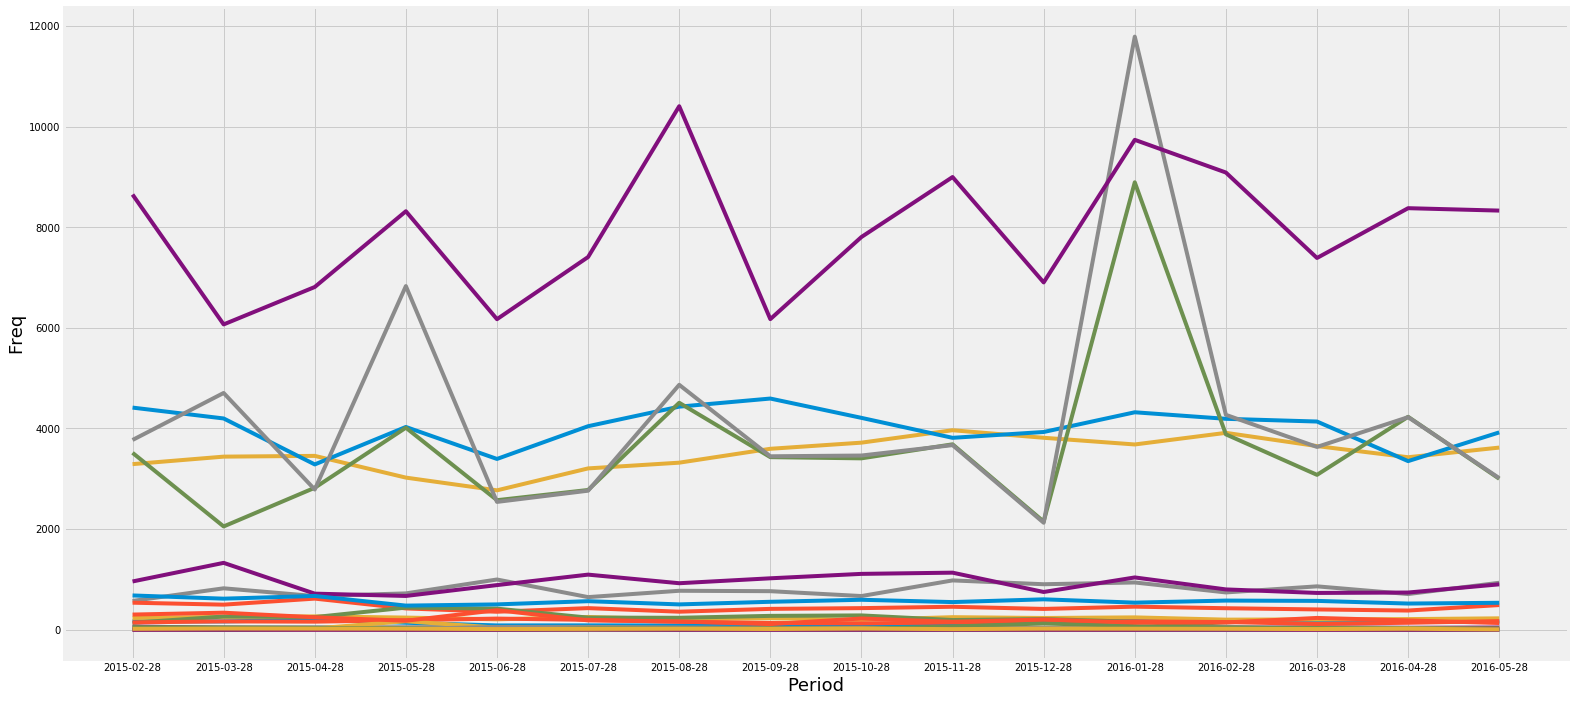

In [101]:
plt.figure(figsize=(24,12))
plt.plot(n_prdDropped_month.index, n_prdDropped_month.values )
plt.ylabel('Freq', fontsize=18)
plt.xlabel('Period', fontsize=18)
plt.show()

In [88]:
n_prdDropped_month[product_cols].sum(axis=0).sort_values(ascending=False)

ind_recibo_ult1      126655
ind_nom_pens_ult1     67902
ind_tjcr_fin_ult1     64277
ind_nomina_ult1       58024
ind_cco_fin_ult1      55892
ind_dela_fin_ult1     14794
ind_cno_fin_ult1      12693
ind_ecue_fin_ult1      9053
ind_ctop_fin_ult1      7075
ind_ctpp_fin_ult1      3634
ind_valo_fin_ult1      3315
ind_deco_fin_ult1      3174
ind_fond_fin_ult1      2492
ind_ctma_fin_ult1      2224
ind_deme_fin_ult1       641
ind_plan_fin_ult1       632
ind_ctju_fin_ult1       571
ind_hip_fin_ult1        468
ind_viv_fin_ult1        250
ind_pres_fin_ult1       232
ind_cder_fin_ult1       109
ind_ahor_fin_ult1        10
ind_reca_fin_ult1         9
ind_aval_fin_ult1         5
dtype: int64

Number of products acquired and dropped seems to follow some similar trend

### AGE <a id='age'></a>

Age, renta and antiguedad are the only numerical values. 

In [33]:
print(DfTrain.age.unique())

[' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' ' 11' ' 73' ' 62' ' 66' ' 17' ' 68'
 ' 82' ' 95' ' 96' ' 56' ' 61' ' 79' ' 72' ' 14' ' 19' ' 13' ' 86' ' 64'
 ' 20' ' 89' ' 71' '  7' ' 70' ' 74' ' 21' ' 18' ' 75' '  4' ' 80' ' 81'
 '  5' ' 76' ' 92' ' 93' ' 85' ' 91' ' 87' ' 90' ' 94' ' 99' ' 98' ' 88'
 ' 97' '100' '101' '106' '103' '  3' '  2' '102' '104' '111' '107' '109'
 '105' '112' '115' '110' '116' '108' '113' 37 81 43 30 45 41 67 59 46 36
 47 69 39 44 40 38 34 42 31 35 48 60 54 51 33 62 50 11 57 55 85 80 70 32
 52 94 61 13 29 49 76 28 63 10 88 68 64 58 56 79 53 77 74 82 89 86 72 95
 66 71 78 75 27 22 23 65 21 26 98 19 84 83 90 12 14 87 93 18 92 99 17 97
 102 16 73 91 15 25 24 20 96 104 110 103 106 105 11

In [34]:
DfTrain.age= DfTrain.age.replace(to_replace=[' NA'], value=np.nan)


In [35]:
DfTrain.age= DfTrain.age.astype(np.float16)

In [36]:
DfTrain.age.isnull().sum()

27734

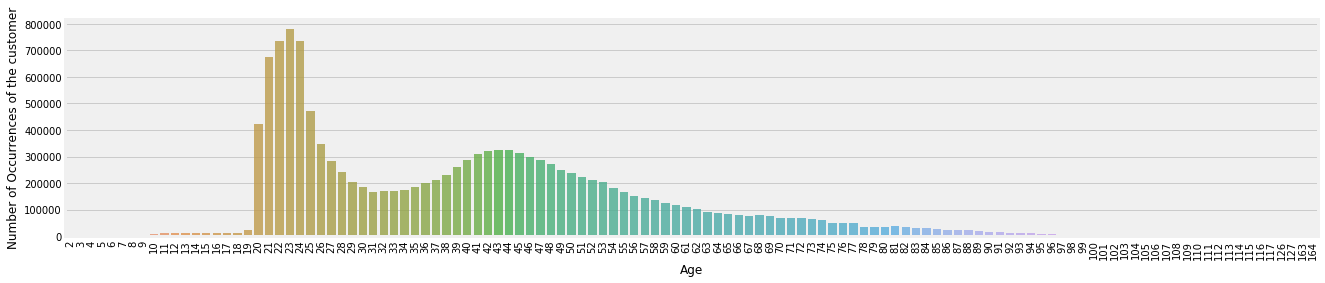

In [37]:
n_age= DfTrain.age.value_counts()
plt.figure(figsize=(20,4))
sns.barplot(n_age.index.astype('int'), n_age.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

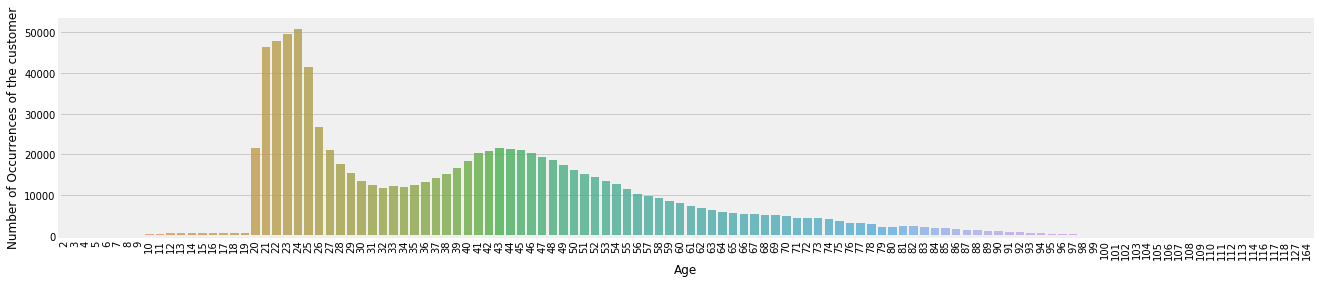

In [38]:
n_age= DfTest.age.value_counts()
plt.figure(figsize=(20,4))
sns.barplot(n_age.index.astype('int'), n_age.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Test and train data have the same shape in the distribution

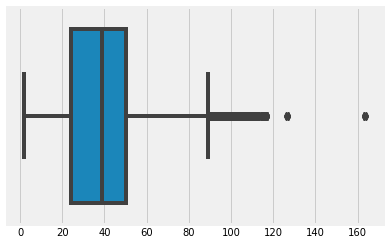

In [39]:
sns.boxplot(DfTrain.age.values)
plt.show()

### Antiguedad <a id='antiguedad'></a>

In [40]:
print((DfTrain.antiguedad.unique()))

['      6' '     35' '     34' '     NA' '     33' '     31' '     21'
 '     16' '     27' '      9' '     22' '     13' '     29' '      8'
 '     11' '     10' '     28' '     24' '      7' '     25' '     14'
 '     26' '     12' '     23' '      1' '     18' '      4' '      3'
 '     17' '     32' '     30' '     20' '     15' '     19' '    157'
 '     36' '      5' '     40' '     38' '     37' '     39' '      0'
 '      2' '     47' '     44' '     42' '     46' '     45' '     43'
 '     41' '     57' '     48' '     52' '     49' '     50' '     56'
 '     58' '     51' '     55' '     54' '     53' '     59' '     62'
 '     61' '     60' '     63' '    139' '    165' '    118' '    164'
 '    142' '     94' '    159' '    143' '    105' '    151' '    162'
 '    137' '    150' '    128' '    122' '    156' '    119' '    160'
 '     79' '     95' '    132' '    161' '     98' '    127' '     72'
 '    155' '    108' '    163' '    102' '    148' '    115' '    146'
 '    

In [41]:
DfTrain.antiguedad= DfTrain.antiguedad.replace(to_replace=['     NA'], value=np.nan)

In [42]:
DfTrain.antiguedad.isnull().sum()

27734

In [43]:
DfTrain.antiguedad= DfTrain.antiguedad.astype(np.float16)

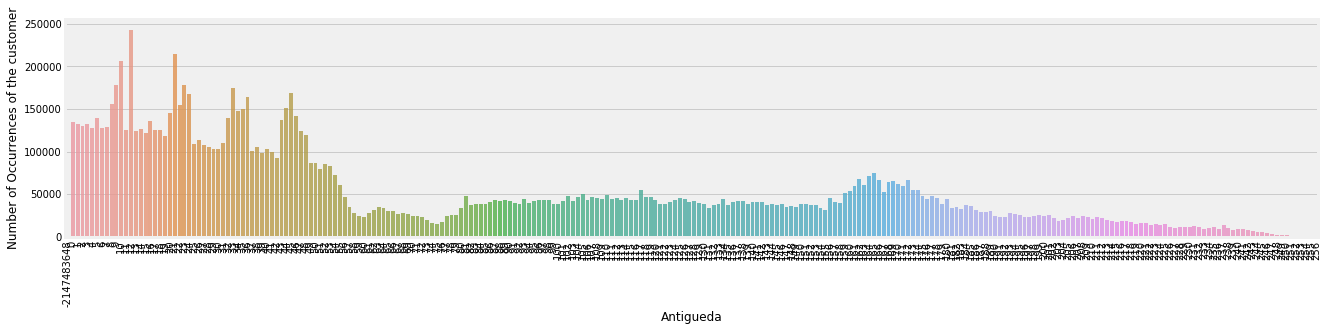

In [44]:
n_ant= DfTrain.antiguedad.value_counts()
n_antS=n_ant[n_ant.values<100]
plt.figure(figsize=(20,4))
sns.barplot(n_ant.index.astype('int'), n_ant.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Antigueda', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

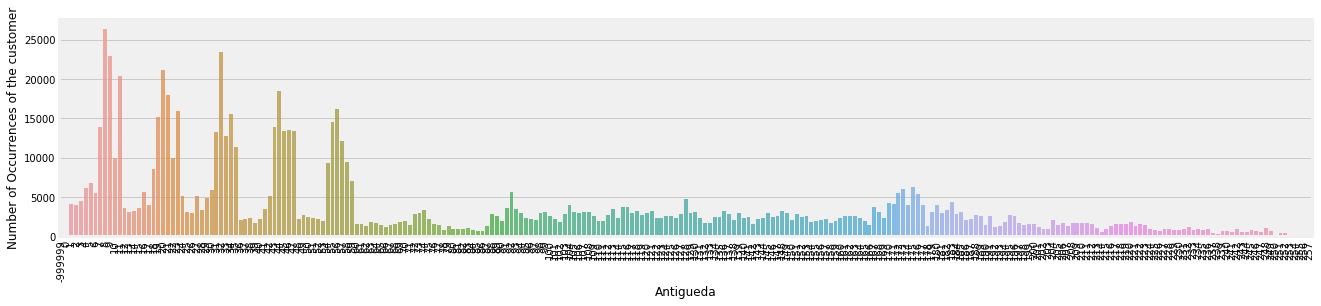

In [45]:
n_ant= DfTest.antiguedad.value_counts()
n_antS=n_ant[n_ant.values<100]
plt.figure(figsize=(20,4))
sns.barplot(n_ant.index.astype('int'), n_ant.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Antigueda', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Test customers present similar distribution 

In [46]:
DfTrain.antiguedad.unique()

array([  6.,  35.,  34.,  nan,  33.,  31.,  21.,  16.,  27.,   9.,  22.,
        13.,  29.,   8.,  11.,  10.,  28.,  24.,   7.,  25.,  14.,  26.,
        12.,  23.,   1.,  18.,   4.,   3.,  17.,  32.,  30.,  20.,  15.,
        19., 157.,  36.,   5.,  40.,  38.,  37.,  39.,   0.,   2.,  47.,
        44.,  42.,  46.,  45.,  43.,  41.,  57.,  48.,  52.,  49.,  50.,
        56.,  58.,  51.,  55.,  54.,  53.,  59.,  62.,  61.,  60.,  63.,
       139., 165., 118., 164., 142.,  94., 159., 143., 105., 151., 162.,
       137., 150., 128., 122., 156., 119., 160.,  79.,  95., 132., 161.,
        98., 127.,  72., 155., 108., 163., 102., 148., 115., 146., 107.,
        81., 216., 135.,  92., 121., 198., 134.,  93., 140., 110., 120.,
       147., 116.,  64.,  77.,  85.,  99.,  78., 100., 113., 154., 166.,
       133., 124., 141.,  66., 117.,  86., 193.,  80., 144.,  87., 126.,
       158., 101., 235.,  88., 145., 103., 149., 109., 131.,  97.,  68.,
        84., 232., 125., 177., 112.,  96.,  69., 17

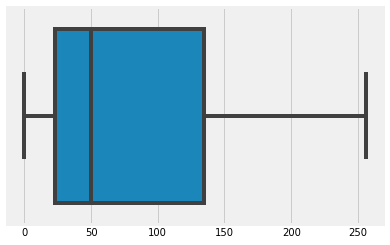

In [47]:
sns.boxplot(DfTrain.antiguedad.values)
plt.show()

### Renta <a id='renta'></a>

In [48]:
DfTrain.renta.isnull().value_counts()

False    10852934
True      2794375
Name: renta, dtype: int64

In [49]:
DfTrain.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

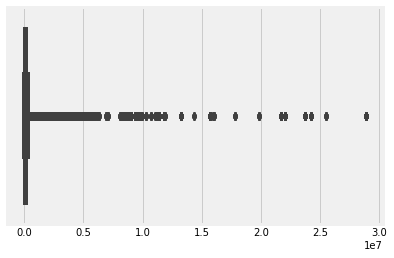

In [50]:
sns.boxplot(DfTrain.renta.values)
plt.show()

In [51]:
round(np.average(DfTest.age.dropna()))

40.0

The function bellow are used to treat the three variables and are launched in the final part of the code

In [52]:

def preAge(Df):
    Df.age= Df.age.replace(to_replace=[' NA'], value=np.nan)
    Df.age= Df.age.astype(np.float64)

    print("Number of missing:", Df.age.isnull().sum())

    minAge=12
    maxAge=90
    nanAge=40

    print("average age to use in case of missing:", nanAge)

    Df.age = Df.age.map(lambda x: nanAge if np.isnan(x) else x).astype(np.float64)
    Df.age = Df.age.map(lambda x: minAge if x<minAge else x).astype(np.float64)
    Df.age = Df.age.map(lambda x: maxAge if x>maxAge else x).astype(np.float64)
    


In [53]:
def preAntiguedad(Df):
    Df.antiguedad= Df.antiguedad.replace(to_replace=['     NA'], value=np.nan)
    Df.antiguedad= Df.antiguedad.astype(np.float64)

    print("Number of missing:", Df.antiguedad.isnull().sum())

    minAnt=0
    maxAnt=256
    nanAnt=78
    print("average to use in case of missing:", nanAnt)

    Df.antiguedad = Df.antiguedad.map(lambda x: nanAnt if not np.isfinite(x) else x).astype(np.float64)
    Df.antiguedad = Df.antiguedad.map(lambda x: minAnt if x<minAnt else x).astype(np.float64)
    Df.antiguedad = Df.antiguedad.map(lambda x: maxAnt if x>maxAnt else x).astype(np.float64)

In [54]:
#renta
def preRenta(Df):
    Df.renta= Df.renta.replace(to_replace=['         NA'], value=np.nan)
    Df.renta= Df.renta.astype(np.float64)
    minRenta=0
    maxRenta=1800000
    nanRenta=134254
    print("average to use in case of missing:", nanRenta)


    Df.renta = Df.renta.map(lambda x: nanRenta if not np.isfinite(x) else x)
    Df.renta = Df.renta.map(lambda x: minRenta if x<minRenta else x)
    Df.renta = Df.renta.map(lambda x: maxRenta if x>maxRenta else x)

In [55]:
DfTest.renta.unique()

array(['  326124.90', '         NA', '  148402.98', ..., '  139164.12',
       '  100647.45', '   72765.27'], dtype=object)

In [56]:
DfTrain.ind_empleado.unique() 

array(['N', nan, 'A', 'B', 'F', 'S'], dtype=object)

In [57]:
DfTrain.pais_residencia.unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [58]:
DfTrain.sexo.unique() 

array(['H', 'V', nan], dtype=object)

In [59]:
DfTrain.ind_nuevo.unique() 

array([ 0., nan,  1.])

In [60]:

DfTrain.ult_fec_cli_1t.isnull().value_counts()

True     13622516
False       24793
Name: ult_fec_cli_1t, dtype: int64

In [61]:

DfTrain.indrel_1mes.unique()

array([1.0, nan, 3.0, 2.0, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

In [62]:

DfTrain.indrel_1mes.isnull().value_counts()

False    13497528
True       149781
Name: indrel_1mes, dtype: int64

In [63]:
DfTrain.tiprel_1mes.unique()

array(['A', 'I', nan, 'P', 'R', 'N'], dtype=object)

In [64]:
DfTrain.indresi.unique()

array(['S', nan, 'N'], dtype=object)

In [65]:
DfTrain.indext.unique()

array(['N', 'S', nan], dtype=object)

In [66]:
DfTrain.canal_entrada.unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', nan, 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', 'KGC',
       'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG', 'KFG',
       'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI', 'KFU',
       'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY', 'KFF',
       'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL', 'KAY',
       'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ', 'KDA',
       'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007', 'KEU',
       'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ', 'KCN',
       'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA', 'KBH',
       'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW', 'KDZ',
       'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM', 'KEZ',
       'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX', 'KDB',
       'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL', 'KDG',
       'KDF', '

In [67]:
DfTrain.canal_entrada.isnull().sum()

186126

In [68]:
DfTrain.indrel_1mes.unique()

array([1.0, nan, 3.0, 2.0, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

In [69]:
DfTrain.indrel.unique()

array([ 1., nan, 99.])

In [70]:
ind_empleado_d = {'-333': 0,'N':1,'A':2,'B':3,'F':4,'S':5}

sexo_d = {'V':0,'H':1,'-333':2}


pais_residencia_d =  {'-333': 1,'LV': 102, 'BE': 12, 'BG': 50, 'BA': 61, 'BM': 117, 'BO': 62, 'JP': 82, 'JM': 116, 'BR': 17,
'BY': 64, 'BZ': 113, 'RU': 43, 'RS': 89, 'RO': 41, 'GW': 99, 'GT': 44, 'GR': 39, 'GQ': 73, 'GE': 78, 
'GB': 9, 'GA': 45, 'GN': 98, 'GM': 110, 'GI': 96, 'GH': 88, 'OM': 100, 'HR': 67, 'HU': 106, 'HK': 34, 
'HN': 22, 'AD': 35, 'PR': 40, 'PT': 26, 'PY': 51, 'PA': 60, 'PE': 20, 'PK': 84, 'PH': 91, 'PL': 30, 
'EE': 52, 'EG': 74, 'ZA': 75, 'EC': 19, 'AL': 25, 'VN': 90, 'ET': 54, 'ZW': 114, 'ES': 0, 'MD': 68, 
'UY': 77, 'MM': 94, 'ML': 104, 'US': 15, 'MT': 118, 'MR': 48, 'UA': 49, 'MX': 16, 'IL': 42, 'FR': 8, 
'MA': 38, 'FI': 23, 'NI': 33, 'NL': 7, 'NO': 46, 'NG': 83, 'NZ': 93, 'CI': 57, 'CH': 3, 'CO': 21, 
'CN': 28, 'CM': 55, 'CL': 4, 'CA': 2, 'CG': 101, 'CF': 109, 'CD': 112, 'CZ': 36, 'CR': 32, 'CU': 72,
'KE': 65, 'KH': 95, 'SV': 53, 'SK': 69, 'KR': 87, 'KW': 92, 'SN': 47, 'SL': 97, 'KZ': 111, 'SA': 56,
'SG': 66, 'SE': 24, 'DO': 11, 'DJ': 115, 'DK': 76, 'DE': 10, 'DZ': 80, 'MK': 105, 'LB': 81, 
'TW': 29, 'TR': 70, 'TN': 85, 'LT': 103, 'LU': 59, 'TH': 79, 'TG': 86, 'LY': 108, 'AE': 37, 
'VE': 14, 'IS': 107, 'IT': 18, 'AO': 71, 'AR': 13, 'AU': 63, 'AT': 6, 'IN': 31, 'IE': 5, 'QA': 58,
'MZ': 27}


tiprel_1mes_d= {'-333':0, 'I':1, 'A':2, 'P':3, 'R':4, 'N':5}

indresi_d={'-333':0, 'S':1, 'N':2}


indext_d={'-333':0, 'S':1, 'N':2}

conyuemp_d={'-333':0, 'S':1, 'N':2}

canal_entrada_d= {'-333':0, 'KAI': 35,'KBG': 17,'KGU': 149,'KDE': 47,'KAJ': 41,'KCG': 59,
 'KHM': 12,'KAL': 74,'KFH': 140,'KCT': 112,'KBJ': 133,'KBL': 88,'KHQ': 157,'KFB': 146,'KFV': 48,'KFC': 4,
 'KCK': 52,'KAN': 110,'KES': 68,'KCB': 78,'KBS': 118,'KDP': 103,'KDD': 113,'KBX': 116,'KCM': 82,
 'KAE': 30,'KAB': 28,'KFG': 27,'KDA': 63,'KBV': 100,'KBD': 109,'KBW': 114,'KGN': 11,
 'KCP': 129,'KAK': 51,'KAR': 32,'KHK': 10,'KDS': 124,'KEY': 93,'KFU': 36,'KBY': 111,
 'KEK': 145,'KCX': 120,'KDQ': 80,'K00': 50,'KCC': 29,'KCN': 81,'KDZ': 99,'KDR': 56,
 'KBE': 119,'KFN': 42,'KEC': 66,'KDM': 130,'KBP': 121,'KAU': 142,'KDU': 79,
 'KCH': 84,'KHF': 19,'KCR': 153,'KBH': 90,'KEA': 89,'KEM': 155,'KGY': 44,'KBM': 135,
 'KEW': 98,'KDB': 117,'KHD': 2,'RED': 8,'KBN': 122,'KDY': 61,'KDI': 150,'KEU': 72,
 'KCA': 73,'KAH': 31,'KAO': 94,'KAZ': 7,'004': 83,'KEJ': 95,'KBQ': 62,'KEZ': 108,
 'KCI': 65,'KGW': 147,'KFJ': 33,'KCF': 105,'KFT': 92,'KED': 143,'KAT': 5,'KDL': 158,
 'KFA': 3,'KCO': 104,'KEO': 96,'KBZ': 67,'KHA': 22,'KDX': 69,'KDO': 60,'KAF': 23,'KAW': 76,
 'KAG': 26,'KAM': 107,'KEL': 125,'KEH': 15,'KAQ': 37,'KFD': 25,'KEQ': 138,'KEN': 137,
 'KFS': 38,'KBB': 131,'KCE': 86,'KAP': 46,'KAC': 57,'KBO': 64,'KHR': 161,'KFF': 45,
 'KEE': 152,'KHL': 0,'007': 71,'KDG': 126,'025': 159,'KGX': 24,'KEI': 97,'KBF': 102,
 'KEG': 136,'KFP': 40,'KDF': 127,'KCJ': 156,'KFR': 144,'KDW': 132,-1: 6,'KAD': 16,
 'KBU': 55,'KCU': 115,'KAA': 39,'KEF': 128,'KAY': 54,'KGC': 18,'KAV': 139,'KDN': 151,
 'KCV': 106,'KCL': 53,'013': 49,'KDV': 91,'KFE': 148,'KCQ': 154,'KDH': 14,'KHN': 21,
 'KDT': 58,'KBR': 101,'KEB': 123,'KAS': 70,'KCD': 85,'KFL': 34,'KCS': 77,'KHO': 13,
 'KEV': 87,'KHE': 1,'KHC': 9,'KFK': 20,'KDC': 75,'KFM': 141,'KHP': 160,'KHS': 162,
 'KFI': 134,'KGV': 43}

indfall_d={'-333':0, 'S':1, 'N':2}


#ind_actividad_cliente_d={'0':0, '1':1, '-333':2},
segmento_d={ '-333':0, '02 - PARTICULARES':2, '03 - UNIVERSITARIO':3, '01 - TOP':1}


The function bellow transfor the variables in numerical values reado to be used in Scikit

In [71]:
def encodeHot (Df):
   
    
    Df.ind_empleado.fillna('-333', inplace=True)
    Df.ind_empleado = Df.ind_empleado.map(lambda x: ind_empleado_d[x]).astype(np.int8)
    
    Df.pais_residencia.fillna('-333', inplace=True)
    Df.pais_residencia = Df.pais_residencia.map(lambda x: pais_residencia_d[x]).astype(np.int16)
    
    Df.sexo.fillna('-333', inplace=True)
    Df.sexo = Df.sexo.map(lambda x: sexo_d[x]).astype(np.int8)
    
    Df.ind_nuevo.fillna('2', inplace=True)
    Df.ind_nuevo=  Df.ind_nuevo.astype(np.int8)
    
    Df.drop('fecha_alta',axis=1,inplace=True)
    
    Df.indrel.fillna(-333, inplace=True)
    
    #Df.indrel_1mes.fillna('-2', inplace=True)
    #Df.indrel_1mes=Df.indrel_1mes.astype(np.float16)
    
    Df.ult_fec_cli_1t = Df.ult_fec_cli_1t.map(lambda x: 0 if pd.isnull(x) else 1).astype(np.int8)
    
    
  
    Df.indrel_1mes= Df.indrel_1mes.map(lambda x: -1 if x == 'P' else x).astype(np.float16)
    #Df.indrel_1mes=Df.indrel_1mes.astype(np.int8)
    
    
    Df.tiprel_1mes.fillna('-333', inplace=True)
    Df.tiprel_1mes= Df.tiprel_1mes.map(lambda x: tiprel_1mes_d[x]).astype(np.float16)
    #Df.tiprel_1mes=Df.tiprel_1mes.astype(np.int8)
    
    
    
    Df.indresi.fillna('-333', inplace=True)
    Df.indresi= Df.indresi.map(lambda x: indresi_d[x]).astype(np.int8)
    
    
    
    Df.indext.fillna('-333', inplace=True)
    Df.indext= Df.indext.map(lambda x: indext_d[x]).astype(np.int8)
    
    
    Df.conyuemp.fillna('-333', inplace=True)
    Df.conyuemp= Df.conyuemp.map(lambda x: conyuemp_d[x]).astype(np.int8)
    
    
    Df.canal_entrada.fillna('-333', inplace=True)
    Df.canal_entrada= Df.canal_entrada.map(lambda x: canal_entrada_d[x]).astype(np.int8)
    
    Df.indfall.fillna('-333', inplace=True)
    Df.indfall= Df.indfall.map(lambda x: indfall_d[x]).astype(np.int8)
    
    Df.tipodom.fillna(0, inplace=True)
    Df.tipodom= Df.tipodom.astype(np.int8)

    Df.drop('nomprov',axis=1,inplace=True)
    
    Df.cod_prov.fillna(0, inplace=True)
    Df.cod_prov=  Df.cod_prov.astype(np.int8)
    
    Df.ind_actividad_cliente.fillna(2, inplace=True)
    Df.ind_actividad_cliente=  Df.ind_actividad_cliente.astype(np.int8)
    
    Df.segmento.fillna('-333', inplace=True)
    Df.segmento= Df.segmento.map(lambda x: segmento_d[x]).astype(np.int8)  



    return Df
#  




In [72]:
DfTrain=encodeHot(DfTrain)

In [73]:
preAge(DfTrain)
preRenta(DfTrain)
preAntiguedad(DfTrain)

Number of missing: 27734
average age to use in case of missing: 40
average to use in case of missing: 134254
Number of missing: 27734
average to use in case of missing: 78


In [74]:
DfTest=encodeHot(DfTest)

In [75]:
preAge(DfTest)
preRenta(DfTest)
preAntiguedad(DfTest)

Number of missing: 0
average age to use in case of missing: 40
Number of missing: 0
average to use in case of missing: 78


In [76]:
DfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 46 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             int8
pais_residencia          int16
sexo                     int8
age                      float64
ind_nuevo                int8
antiguedad               float64
indrel                   float64
ult_fec_cli_1t           int8
indrel_1mes              float16
tiprel_1mes              float16
indresi                  int8
indext                   int8
conyuemp                 int8
canal_entrada            int8
indfall                  int8
tipodom                  int8
cod_prov                 int8
ind_actividad_cliente    int8
renta                    float64
segmento                 int8
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1        int64
ind_cno_fin_ult1         int64
ind_ctju_fin_ult1        int64
ind_ctma_fin_ult1

In [77]:
DfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 22 columns):
fecha_dato               929615 non-null object
ncodpers                 929615 non-null int64
ind_empleado             929615 non-null int8
pais_residencia          929615 non-null int16
sexo                     929615 non-null int8
age                      929615 non-null float64
ind_nuevo                929615 non-null int8
antiguedad               929615 non-null float64
indrel                   929615 non-null int64
ult_fec_cli_1t           929615 non-null int8
indrel_1mes              929592 non-null float16
tiprel_1mes              929615 non-null float16
indresi                  929615 non-null int8
indext                   929615 non-null int8
conyuemp                 929615 non-null int8
canal_entrada            929615 non-null int8
indfall                  929615 non-null int8
tipodom                  929615 non-null int8
cod_prov                 929615 non-null int

## Ouput <a id='ouput'></a>

In [78]:
DfTrain.to_csv( 'train_prePro.csv',index=False)


In [79]:
DfTest.to_csv( 'test_prePro.csv',index=False)